In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df = df.drop(['area_type','society','balcony','availability'],axis='columns')
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [5]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [6]:
df = df.dropna()
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [7]:
df.shape

(13246, 5)

In [8]:
def size(string):
    li = (string.split(" "))[0]
    return li

e = '10 bhk'
print(size(e))

10


In [9]:
df['bhk'] = df['size'].apply(size)
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [10]:
df.sample(4)

,location,size,total_sqft,bath,price,bhk
6983,Thigalarapalya,3 BHK,2072,4.0,160.0,3
2029,Thigalarapalya,4 BHK,3122,6.0,235.0,4
3,Lingadheeranahalli,3 BHK,1521,3.0,95.0,3
12826,Kaggadasapura,3 BHK,1400,2.0,68.0,3


In [11]:
df.head(20)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,38.00,2
6,Old Airport Road,4 BHK,2732,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4
8,Marathahalli,3 BHK,1310,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00,6


In [12]:
df['bhk'].unique()

array(['2', '4', '3', '6', '1', '8', '7', '5', '11', '9', '27', '10',
       '19', '16', '43', '14', '12', '13', '18'], dtype=object)

In [13]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
df.bhk.dtype

dtype('O')

In [15]:
df.bhk.astype(int)

0        2
1        4
2        3
3        3
4        2
        ..
13315    5
13316    4
13317    2
13318    4
13319    1
Name: bhk, Length: 13246, dtype: int32

In [16]:
df['bhk'] = df.bhk.astype(int)

In [17]:
df.total_sqft.dtype

dtype('O')

In [18]:
def convert_float(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None     

In [19]:
df['total_sqft'] = df['total_sqft'].apply(convert_float)

In [20]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [21]:
df.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [22]:
df.shape

(13246, 6)

In [23]:
df['price_per_sqr_ft'] = df['price']*100000/df['total_sqft']

In [24]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqr_ft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [25]:
df.isnull().sum()

location             0
size                 0
total_sqft          46
bath                 0
price                0
bhk                  0
price_per_sqr_ft    46
dtype: int64

In [26]:
df = df.dropna()
df.isnull().sum()

location            0
size                0
total_sqft          0
bath                0
price               0
bhk                 0
price_per_sqr_ft    0
dtype: int64

In [27]:
df.shape

(13200, 7)

In [28]:
location_stats = df['location'].value_counts(ascending=False)

In [29]:
location_stats.values.sum()

13200

In [30]:
location_stats_less_than_10 = location_stats[location_stats<=10]
len(location_stats_less_than_10)

1058

In [31]:
def location_sort(x):
    if x in location_stats_less_than_10:
        return 'other'
    else:
        return x

In [32]:
df['location'] = df['location'].apply(location_sort)

In [33]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqr_ft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [34]:
df[df.total_sqft/df.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqr_ft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


# outlier removal

In [35]:
df = df[~(df.total_sqft/df.bhk<300)]
df.shape

(12456, 7)

In [36]:
df['price_per_sqr_ft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqr_ft, dtype: float64

### outlier removal

In [37]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqr_ft)
        st = np.std(subdf.price_per_sqr_ft)
        reduced_df = subdf[(subdf.price_per_sqr_ft>(m-st)) & (subdf.price_per_sqr_ft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df = remove_pps_outliers(df)
df.shape    

(10245, 7)

In [38]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqr_ft),
                'std': np.std(bhk_df.price_per_sqr_ft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqr_ft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df = remove_bhk_outliers(df)
# df8 = df7.copy()
df.shape

(7331, 7)

In [39]:
df.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

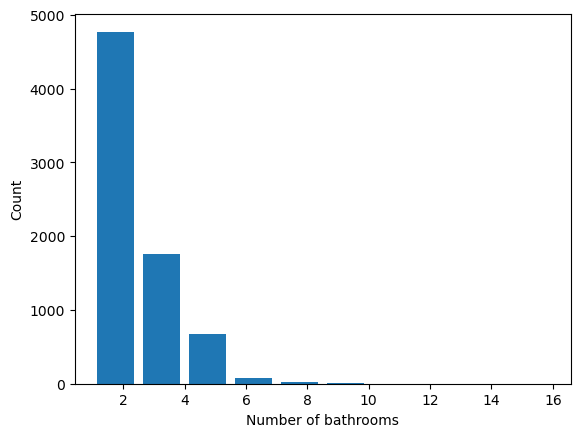

In [40]:
plt.hist(df.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [41]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqr_ft
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3,4561.403509
5,Devarachikkanahalli,2 BHK,947.0,2.0,43.0,2,4540.654699


In [42]:
df[df.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqr_ft
5271,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8478,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8567,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9307,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [43]:
df[df.bath>df.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqr_ft
1637,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5232,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6702,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8402,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [44]:
df = df[df.bath<df.bhk+2]
df.shape

(7253, 7)

In [45]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqr_ft
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3,4561.403509
5,Devarachikkanahalli,2 BHK,947.0,2.0,43.0,2,4540.654699


In [46]:
df = df.drop(['size','price_per_sqr_ft'],axis='columns')
df.head(3)

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2


In [47]:
dummies = pd.get_dummies(df.location)
dummies.head(3)

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df = pd.concat([df,dummies.drop('other',axis='columns')],axis='columns')
df.head()

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,65.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,947.0,2.0,43.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df.shape

(7253, 245)

In [50]:
df = df.drop('location',axis='columns')
df.head(2)

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df.shape

(7253, 244)

In [52]:
df.isnull().sum()

total_sqft              0
bath                    0
price                   0
bhk                     0
 Devarachikkanahalli    0
                       ..
Yelachenahalli          0
Yelahanka               0
Yelahanka New Town      0
Yelenahalli             0
Yeshwanthpur            0
Length: 244, dtype: int64

### Building Model

In [53]:
x = df.drop(['price'], axis = 'columns')
x.head()

,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
x.shape

(7253, 243)

In [55]:
y = df['price']
y.shape

(7253,)

In [56]:
y.head()

1    40.0
2    83.0
3    40.0
4    65.0
5    43.0
Name: price, dtype: float64

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [58]:
type(y_train)

pandas.core.series.Series

In [59]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [60]:
y_pred_dt = dtr.predict(x_train)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_dt)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_dt)))

Mean Absolute Error: 2.595830143500926
Root Mean Squared Error: 8.268650332115644


In [61]:
y_pred_dt = dtr.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_dt)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt)))

Mean Absolute Error: 20.483408168264262
Root Mean Squared Error: 40.51763925207494


In [62]:
rfr = RandomForestRegressor(random_state=0)
rfr.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [63]:
y_pred_rf = rfr.predict(x_train)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_rf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_rf)))

Mean Absolute Error: 8.301117888876654
Root Mean Squared Error: 18.25962815827776


In [64]:
y_pred_rf = rfr.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rf)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

Mean Absolute Error: 19.10343415881199
Root Mean Squared Error: 35.56645342782571


In [65]:
xgb = XGBRegressor(random_state=0)
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [66]:
y_pred_xg = xgb.predict(x_train)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_xg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_xg)))

Mean Absolute Error: 12.656873398129589
Root Mean Squared Error: 20.748028583598167


In [67]:
y_pred_xg = xgb.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_xg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_xg)))

Mean Absolute Error: 16.797219263703802
Root Mean Squared Error: 30.182306375279477


In [68]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [69]:
y_pred_l = lr.predict(x_train)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_l))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_l)))

Mean Absolute Error: 16.81324871042567
Root Mean Squared Error: 33.48699612940386


In [70]:
y_pred_l = lr.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_l))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_l)))

Mean Absolute Error: 19.004681001229958
Root Mean Squared Error: 34.400443615513964


## Saving the model 

In [73]:
import pickle
pickle.dump(xgb, open('model.pkl','wb'))

In [53]:
import json
columns = {
    'data_columns' : [col for col in x.columns]
}
with open("columns2.json","w") as f:
    f.write(json.dumps(columns))